# TensorFlow简介

TensorFlow是一个用于数值计算的强大开源软件库，非常适合大型机器学习。TensorFlow从2015年11月宣布开源的时候，深度学习领域已经存在众多流行的开源库(Caffe、Deeplearning4j、H2O、MXNet等),，不过，TensorFLow凭借自己清晰的设计、扩展性、灵活性和完善的文档很快排在了各个开源库的顶端。TensorFLow库的亮点有：
- (1)可以允许在Windows、Linux、macOS和移动设备上，包括IOS和Android
- (2)它提供了一个非常简单的名叫TF.Learn(tensorflow.contrib.learn)的Python API来兼容sklearn
- (3)它提供了另一个叫做TF_Slim(tensorflow.contrib.slim)的简单的API来简化神经网络的构建、训练和评估
- (4)在Tensorflow之上，独立构建了一些高级的API，比如Keras和Pretty Tensor
- (5)它的Python API提供了很多灵活的方法(代价是很高的复杂性)来创建所有类型的计算，包括所有你能想到的神经网络架构
- (6)它包含了很多非常高效的、用C++实现的机器学习操作，特别是用来构建神经网络的操作。另外，通过它的API，还可以用C++来实现自己的高性能操作
- (7)它为搜索最小化成本函数的参数提供了很多高度优化的节点。TensorFlow会自动计算你定义的成本函数的梯度，所以用起来会非常容易，这称为自动微分(autodiff)
- (8)它还提供了一个非常强大的叫做TensorBoard的可视化工具，可以用来浏览计算图，查看学习曲线等
- (9)Google还启动了一个运行TensorFlow计算图的云服务

# 常量

tf.constant(value,dtype=None,shape=None,name='Const',verify_shale=False)

In [6]:
import tensorflow as tf
a = tf.constant(1,shape=[],name='a')
b = tf.constant((2,3,4),shape=[3],name = 'b')
c = tf.constant(3,shape=[2,2],name='c')
sess = tf.Session()
result = sess.run([a,b,c])
print('a:',result[0])
print('b:',result[1])
print('c:',result[2])

a: 1
b: [2 3 4]
c: [[3 3]
 [3 3]]


# 变量

tensorflow中的变量在使用前需要进行初始化，在模型训练中或训练完成后可以保存或恢复这些变量

tf.Variable(initial_value=None,trainabel=True,colletions=None,validate_shape=True,caching_device=None,
            name=None,variable_def=None,dtype=None,excepted_shape=None,import_scope=None,constraint=None)
            
trainable:决定变量是否可以被优化器类修改

In [7]:
import tensorflow as tf
weights = tf.Variable(tf.random_normal([784,200],stddev=0.35),name='weights')
biases = tf.Variable(tf.zeros([200]),name='biases')

## 初始化变量

实际上，在变量初始化过程中做了很多的操作，比如初始化空间、赋初值(等价于tf.assign)，并把Variable添加到Graph中等，注意，在计算前需要初始化所有的Variable,一般会在定义graph时定义global_variables_initializer,它会在session运算时初始化所有变量，注意，这个操作不会立刻做初始化，它只是在图中创建了一个节点，这个节点会在会话执行时初始化所有变量

直接调用global_variables_initializer会初始化的variable,如果想初始化部分variable,可以调用tf.variables_initializer

In [8]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

## 在执行期，如何为一个变量设任意的值

可以在构造一个图时知道变量初始值，它会在后边的执行期运行变量初始化器的时候被初始化，如果想在执行期修改变量的值，那么最简单的方式是使用tf.assign函数创建一个赋值节点(在图的构造期)，将变量和一个占位符传入作为，这样，就可以在执行期运行复制操作来为变量传入新值

In [11]:
import tensorflow as tf

x = tf.Variable(tf.random_uniform(shape=(),minval=0.0,maxval=1.0))
x_new_val = tf.placeholder(shape=(),dtype=tf.float32)
x_assign = tf.assign(x,x_new_val)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    x_assign.eval(feed_dict={x_new_val: 5.0})
    print(x.eval())

5.0


# 占位符

tf.placeholder(dtype,shape=None,name=None)

In [9]:
import tensorflow as tf
import numpy as np

g_1 = tf.Graph()
with g_1.as_default():
    x = tf.placeholder(dtype=tf.float32,shape=(2,3))
    y = tf.reshape(x,(3,2))
    z = tf.matmul(x,y)
    
with tf.Session(graph = g_1) as sess:
    rand_array_x = np.random.rand(2,3)
    result = sess.run([y,z],feed_dict={x:rand_array_x})
    print('y:',result[0])
    print('z:',result[1])

y: [[0.7448921  0.24302486]
 [0.23352031 0.6745004 ]
 [0.49287876 0.51692814]]
z: [[0.72671276 0.46566087]
 [0.87231016 0.763582  ]]


# 管理图

你创建的所有节点都会自动添加到默认图上:

In [3]:
import tensorflow as tf

x = tf.Variable(1,name='X')
print(x.graph is tf.get_default_graph())

True


大部分情况下，这都不是问题，不过有时候你可能想要管理多个互不依赖的图。可以创建一个新的图，然后用with块临时将它设置为默认图:

In [4]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2,name='x2')

print(x2.graph is graph)
print(x2.graph is tf.get_default_graph())

True
False


<b>注:</b>在Jupyter中，做实验时经常会执行通一条命令，这样可能会在同一个图上添加很多重复的节点。一种做法是重启Jupyter内核，更方便的做法是通过tf.reset_default_graph()来重置默认图

# 节点值得生命周期

In [6]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


首先，这段代码定义了一个非常简单的计算图，然后，它启动了一个会话，并开始执行计算图，求y时Tensorflow会自动检测y依赖w，因为x依赖于w，所以它会先求w,然后是y,并返回y的值，最后，这段代码执行到对z求值得时候，tensorflow发现需要先求w和x,需要注意<b>tensorflow不会复用上一步求值得w和x的结果，简而言之，w和x的值会计算两次</b>

在图的每次执行间，所有节点值都会被丢弃，但是变量的值不会，因为变量的值是由会话维护的，变量的生命周期从初始化的执行开始，到关闭会话才结束

为了不重复计算，可以采用下列方式进行优化

In [7]:
with tf.Session() as sess:
    x_val,y_val = sess.run([x,y])
    print(x_val,y_val)

5 10


# 使用TensorBoard来可视化图和训练曲线

loss_summary = tf.summary.scalar('log_loss',loss)

logdir = log_dir("logreg")

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

file_writer.add_summary(summary_str, epoch)

#打开Anaconda Prompt输入命令 tensorboard --logdor logdir #注意logdir不需要引号

# 保存和恢复模型

保存模型由三个文件组成model.data、model.index、mode.meta

saver = tf.train.Saver()

模型保存

saver.save(sess,'./tmp/model/',global_step=100)

模型恢复

saver = tf.train.import_meta_graph('./temp/model/-100.meta')

saver.restore(sess,tf.train.latest_checkpoint('./temp/model/'))

# 使用梯度下降实现线性回归

In [11]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing()
#认识数据
print(housing.keys())
print(housing['feature_names'])
x,y = housing['data'],housing['target']
print(x.shape,y.shape)
print(pd.DataFrame(x).info())
print(pd.DataFrame(x).describe())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8) (20640,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
0    20640 non-null float64
1    20640 non-null float64
2    20640 non-null float64
3    20640 non-null float64
4    20640 non-null float64
5    20640 non-null float64
6    20640 non-null float64
7    20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB
None
                  0             1             2             3             4  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      

In [12]:
#将数据进行StandardScaler,并使用梯度下降进行线性回归
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

learning_rate = 0.01
epochs = 1000

standardScaler = StandardScaler()
m,n = x.shape
x_b = np.c_[np.ones((m,1)),x]
x_b_scaler = standardScaler.fit_transform(x_b)
#print(pd.DataFrame(x_b_scaler).describe())
features = tf.constant(x_b_scaler,dtype=tf.float32,name='features')
labels = tf.constant(y.reshape(-1,1),dtype=tf.float32,name='labels')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0),name='theta')
y_pred = tf.matmul(features,theta,name='predict')
error = y_pred - labels
mse = tf.reduce_mean(tf.square(error),name='mse')
gradient = 2/m * tf.matmul(tf.transpose(features),error)
train_op = tf.assign(theta,theta - learning_rate * gradient)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(epochs):
        if epoch % 100 == 0:
            print("epoch:{}--mse:{}".format(epoch,sess.run(mse)))
        sess.run(train_op)
    theta = sess.run(theta)
    print('theta:',theta)

epoch:0--mse:7.973654747009277
epoch:100--mse:4.84791898727417
epoch:200--mse:4.818875789642334
epoch:300--mse:4.814178943634033
epoch:400--mse:4.811120510101318
epoch:500--mse:4.808927536010742
epoch:600--mse:4.807346820831299
epoch:700--mse:4.806206226348877
epoch:800--mse:4.805384159088135
epoch:900--mse:4.804790496826172
theta: [[ 8.8978744e-01]
 [ 8.1084365e-01]
 [ 1.2836684e-01]
 [-2.0548517e-01]
 [ 2.4524277e-01]
 [-7.6121237e-04]
 [-3.9739359e-02]
 [-8.4742779e-01]
 [-8.1470937e-01]]


# 习题：使用小批量梯度下降法来实现逻辑回归，用月亮数据来训练和评估

y_value_counts:
 1    500
0    500
dtype: int64


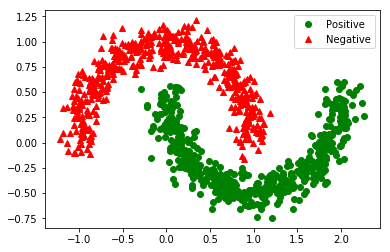

In [19]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

#加载并分析数据集
m = 1000
x,y = make_moons(m,noise=0.1,random_state=42)
print('y_value_counts:\n',pd.Series(y).value_counts())
plt.plot(x[y==1,0],x[y==1,1],'go',label='Positive')
plt.plot(x[y==0,0],x[y==0,1],'r^',label='Negative')
plt.legend()
plt.show()

In [14]:
#拆分数据集为训练数据集和测试数据集
from sklearn.model_selection import train_test_split
import numpy as np

m,n = x.shape
x_b = np.c_[np.ones((m,1)),x]
y = y.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x_b,y,test_size = 0.2)
print(len(x_train),len(x_test))

800 200


In [15]:
#创建小批量数据集
def random_batch(x_train,y_train,batch_size):
    rnd_index = np.random.randint(0,len(x_train),batch_size)
    x_batch = x_train[rnd_index]
    y_batch = y_train[rnd_index]
    return x_batch,y_batch

In [16]:
import tensorflow as tf
X = tf.placeholder(tf.float32,shape=(None,n+1),name='X')
Y = tf.placeholder(tf.float32,shape=(None,1),name='Y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
logits = tf.matmul(X,theta,name='logits')
y_pred = 1 / (1+tf.exp(-logits))
epsilon = 1e-7
loss = -tf.reduce_mean(Y*tf.log(y_pred+epsilon)+(1-Y)*tf.log(1-y_pred+epsilon))
#loss = tf.losses.log_loss(Y,y_pred)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

epochs = 1000
batch_size = 50
init = tf.global_variables_initializer()
nBatchs = len(x_train) // batch_size
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for index in range(nBatchs):
            x_batch,y_batch = random_batch(x_train,y_train,batch_size)
            sess.run(train_op,feed_dict={X:x_batch,Y:y_batch})
        loss_val = loss.eval(feed_dict={X:x_test,Y:y_test})
        if epoch % 50 == 0:
            print('epoch:{},loss:{}'.format(epoch,loss_val))
    y_pred_val = y_pred.eval(feed_dict={X:x_test,Y:y_test})

epoch:0,loss:0.9050483703613281
epoch:50,loss:0.4320598244667053
epoch:100,loss:0.35286587476730347
epoch:150,loss:0.32066577672958374
epoch:200,loss:0.30238354206085205
epoch:250,loss:0.29052868485450745
epoch:300,loss:0.2817750573158264
epoch:350,loss:0.2754625380039215
epoch:400,loss:0.27106961607933044
epoch:450,loss:0.2673935294151306
epoch:500,loss:0.26448526978492737
epoch:550,loss:0.2623862028121948
epoch:600,loss:0.2602671682834625
epoch:650,loss:0.2587374746799469
epoch:700,loss:0.25792568922042847
epoch:750,loss:0.25662773847579956
epoch:800,loss:0.25593602657318115
epoch:850,loss:0.25506362318992615
epoch:900,loss:0.25471794605255127
epoch:950,loss:0.25397127866744995


In [17]:
#评估模型
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy_score:',accuracy_score(y_test,y_pred_val>=0.5))
print('precision_score:',precision_score(y_test,y_pred_val>=0.5))
print('recall_score:',recall_score(y_test,y_pred_val>=0.5))

accuracy_score: 0.88
precision_score: 0.865979381443299
recall_score: 0.8842105263157894


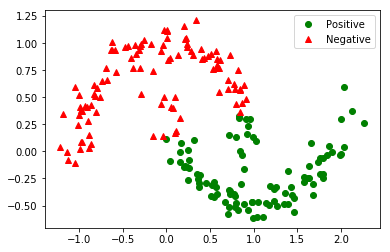

In [18]:
y_test_pred = y_pred_val >=0.5
y_pred_idx = y_test_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(x_test[y_pred_idx, 1], x_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(x_test[~y_pred_idx, 1], x_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

# 对上面的习题进行标准化

In [20]:
from sklearn.datasets import make_moons
import tensorflow as tf
m = 1000
x,y = make_moons(m,noise=0.1,random_state=42)
tf.reset_default_graph()

In [21]:
#拆分数据集为训练数据集和测试数据集
from sklearn.model_selection import train_test_split
import numpy as np

m,n = x.shape
x_b = np.c_[np.ones((m,1)),x]
y = y.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x_b,y,test_size = 0.2)
print(len(x_train),len(x_test))

800 200


In [22]:
#创建小批量数据集
def random_batch(x_train,y_train,batch_size):
    rnd_index = np.random.randint(0,len(x_train),batch_size)
    x_batch = x_train[rnd_index]
    y_batch = y_train[rnd_index]
    return x_batch,y_batch

In [23]:
#定义标准化逻辑回归函数
def logistic_regression(X,Y,initializer=None,seed=42,learning_rate=0.01):
    with tf.name_scope('logistic_regression'):  #使用命名作用域
        with tf.name_scope('model'):
            if initializer is None:
                initializer = tf.random.uniform([n+1,1],-1.0,1.0,seed = seed)
            theta = tf.Variable(initializer,name='theta')
            logits = tf.matmul(X,theta,name='logits')
            y_proba = 1 / (1+tf.exp(-logits))
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(Y,y_proba,scope='loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
            train_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss',loss)
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        return y_proba,loss,train_op,loss_summary,init

In [25]:
#创建函数图表
X = tf.placeholder(tf.float32,shape=(None,n+1),name='X')
Y = tf.placeholder(tf.float32,shape=(None,1),name='Y')

y_proba,loss,train_op,loss_summary,init = logistic_regression(X,Y)

In [26]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "D:\\pystu\\tensorflow_machine_learning_sample\\temp\\"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}\\{}\\".format(root_logdir, name)

In [27]:
#创建会话
epochs = 1000
batch_size = 50
nbatches = len(x_train) // batch_size

logdir = log_dir("logreg")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
                                    
with tf.Session() as sess:
    sess.run(init)
        
    for epoch in range(epochs):
        for batch in range(nbatches):
            x_batch,y_batch = random_batch(x_train,y_train,batch_size)
            sess.run(train_op,feed_dict={X:x_batch,Y:y_batch})
        loss_val,summary_str = sess.run([loss,loss_summary],feed_dict={X:x_test,Y:y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 50 == 0:
            print('epoch:{},loss:{}'.format(epoch,loss_val))
    y_test_pred = sess.run(y_proba,feed_dict={X:x_test,Y:y_test})

epoch:0,loss:0.9038130044937134
epoch:50,loss:0.4526045322418213
epoch:100,loss:0.3838544487953186
epoch:150,loss:0.35708725452423096
epoch:200,loss:0.34126830101013184
epoch:250,loss:0.3308771550655365
epoch:300,loss:0.3232515752315521
epoch:350,loss:0.3181903064250946
epoch:400,loss:0.31383442878723145
epoch:450,loss:0.3107786178588867
epoch:500,loss:0.30848124623298645
epoch:550,loss:0.3059858977794647
epoch:600,loss:0.3042560815811157
epoch:650,loss:0.3029485046863556
epoch:700,loss:0.3019813895225525
epoch:750,loss:0.30129897594451904
epoch:800,loss:0.300251841545105
epoch:850,loss:0.2993678152561188
epoch:900,loss:0.2990092933177948
epoch:950,loss:0.2987637221813202
